In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

import tensorflow as tf

In [2]:
tf.__version__

'2.3.1'

In [3]:
data = pd.read_csv("data/parenting_dataset_asli.csv", index_col="NO")
data.drop(columns=["Responden"], inplace=True)
data.head()

,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,...,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10,Parenting_style
NO,,,,,,,,,,,,,,,,,,,,,
1,1,5,2,5,1,4,1,4,1,5,...,4,3,1,4,1,2,4,1,1,Authoration
2,1,4,2,4,2,5,1,4,5,5,...,2,3,2,3,4,3,2,2,1,Authorative
3,2,4,4,5,5,4,2,5,5,5,...,4,3,4,4,4,4,4,3,3,Authorative
4,1,3,2,4,2,4,1,3,2,5,...,5,2,4,3,3,3,5,5,4,Permissive
5,1,1,3,3,1,1,1,5,3,3,...,5,1,4,3,4,3,4,4,3,Permissive


In [4]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [5]:
X = data.drop(['Parenting_style'], axis = 1)
Y = data['Parenting_style']

print("Shape of Input  features: {}".format(X.shape))
print("Shape of Output features: {}".format(Y.shape))

Shape of Input  features: (500, 52)
Shape of Output features: (500,)


In [6]:
Y.value_counts()

Authorative    182
Authoration    163
Permissive     155
Name: Parenting_style, dtype: int64

In [7]:
X.head()

,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,...,PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10
NO,,,,,,,,,,,,,,,,,,,,,
1,1,5,2,5,1,4,1,4,1,5,...,1,4,3,1,4,1,2,4,1,1
2,1,4,2,4,2,5,1,4,5,5,...,1,2,3,2,3,4,3,2,2,1
3,2,4,4,5,5,4,2,5,5,5,...,4,4,3,4,4,4,4,4,3,3
4,1,3,2,4,2,4,1,3,2,5,...,5,5,2,4,3,3,3,5,5,4
5,1,1,3,3,1,1,1,5,3,3,...,2,5,1,4,3,4,3,4,4,3


In [8]:
lbl_clf = LabelEncoder()
Y_encoded = lbl_clf.fit_transform(Y)

#Keras requires your output feature to be one-hot encoded values.
Y_final = tf.keras.utils.to_categorical(Y_encoded)

print("Therefore, our final shape of output feature will be {}".format(Y_final.shape))

Therefore, our final shape of output feature will be (500, 3)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_final, test_size=0.2, random_state=seed, stratify=Y_encoded, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))

Training Input shape	: (400, 52)
Testing Input shape	: (100, 52)
Training Output shape	: (400, 3)
Testing Output shape	: (100, 3)


In [10]:
std_clf = StandardScaler()
x_train_new = std_clf.fit_transform(x_train)
x_test_new = std_clf.transform(x_test)

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_dim=52, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x_train_new, y_train, epochs=200, batch_size=5)

Epoch 1/200
80/80 [==============================] - 0s 800us/step - loss: 1.2363 - accuracy: 0.3575
Epoch 2/200
80/80 [==============================] - 0s 750us/step - loss: 1.0241 - accuracy: 0.4975
Epoch 3/200
80/80 [==============================] - 0s 713us/step - loss: 0.9201 - accuracy: 0.5625
Epoch 4/200
80/80 [==============================] - 0s 725us/step - loss: 0.8242 - accuracy: 0.6025
Epoch 5/200
80/80 [==============================] - 0s 750us/step - loss: 0.7487 - accuracy: 0.6300
Epoch 6/200
80/80 [==============================] - 0s 725us/step - loss: 0.6903 - accuracy: 0.6475
Epoch 7/200
80/80 [==============================] - 0s 738us/step - loss: 0.6463 - accuracy: 0.6550
Epoch 8/200
80/80 [==============================] - 0s 800us/step - loss: 0.6100 - accuracy: 0.6900
Epoch 9/200
80/80 [==============================] - 0s 725us/step - loss: 0.5767 - accuracy: 0.7200
Epoch 10/200
80/80 [==============================] - 0s 750us/step - loss: 0.5438 - accura

80/80 [==============================] - 0s 913us/step - loss: 5.7763e-04 - accuracy: 1.0000
Epoch 82/200
80/80 [==============================] - 0s 950us/step - loss: 5.4306e-04 - accuracy: 1.0000
Epoch 83/200
80/80 [==============================] - 0s 925us/step - loss: 5.0716e-04 - accuracy: 1.0000
Epoch 84/200
80/80 [==============================] - 0s 1ms/step - loss: 4.7627e-04 - accuracy: 1.0000
Epoch 85/200
80/80 [==============================] - 0s 925us/step - loss: 4.4949e-04 - accuracy: 1.0000
Epoch 86/200
80/80 [==============================] - 0s 925us/step - loss: 4.2682e-04 - accuracy: 1.0000
Epoch 87/200
80/80 [==============================] - 0s 975us/step - loss: 4.0188e-04 - accuracy: 1.0000
Epoch 88/200
80/80 [==============================] - 0s 981us/step - loss: 3.8004e-04 - accuracy: 1.0000
Epoch 89/200
80/80 [==============================] - 0s 938us/step - loss: 3.5896e-04 - accuracy: 1.0000
Epoch 90/200
80/80 [==============================] - 0s 1ms/

80/80 [==============================] - 0s 850us/step - loss: 1.0044e-05 - accuracy: 1.0000
Epoch 158/200
80/80 [==============================] - 0s 775us/step - loss: 9.5117e-06 - accuracy: 1.0000
Epoch 159/200
80/80 [==============================] - 0s 700us/step - loss: 9.0277e-06 - accuracy: 1.0000
Epoch 160/200
80/80 [==============================] - 0s 738us/step - loss: 8.6618e-06 - accuracy: 1.0000
Epoch 161/200
80/80 [==============================] - 0s 700us/step - loss: 8.1605e-06 - accuracy: 1.0000
Epoch 162/200
80/80 [==============================] - 0s 700us/step - loss: 7.7991e-06 - accuracy: 1.0000
Epoch 163/200
80/80 [==============================] - 0s 700us/step - loss: 7.4513e-06 - accuracy: 1.0000
Epoch 164/200
80/80 [==============================] - 0s 713us/step - loss: 7.1059e-06 - accuracy: 1.0000
Epoch 165/200
80/80 [==============================] - 0s 750us/step - loss: 6.7587e-06 - accuracy: 1.0000
Epoch 166/200
80/80 [==============================

In [20]:
model.evaluate(x_test_new, y_test)

4/4 [==============================] - 0s 1000us/step - loss: 3.5840 - accuracy: 0.7400


[3.584010124206543, 0.7400000095367432]

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                848       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 27        
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format. 
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

In [ ]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

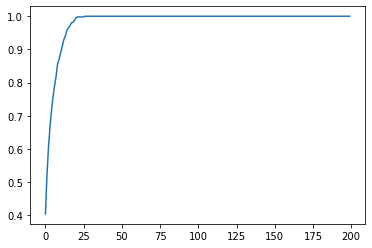

In [53]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()